In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv("lolchamp.csv")
df_copy = df.copy()

In [55]:
df.head(5)

,Unnamed: 0,id,apiname,title,difficulty,herotype,alttype,resource,stats,rangetype,...,be,rp,skill_i,skill_q,skill_w,skill_e,skill_r,skills,fullname,nickname
0,Aatrox,266.0,Aatrox,the Darkin Blade,2,Fighter,Tank,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,...,2400,880,{1: 'Deathbringer Stance'},"{1: 'The Darkin Blade', 2: 'The Darkin Blade 3'}",{1: 'Infernal Chains'},{1: 'Umbral Dash'},{1: 'World Ender'},"{1: 'Deathbringer Stance', 2: 'The Darkin Blad...",NaN,NaN
1,Ahri,103.0,Ahri,the Nine-Tailed Fox,2,Mage,Assassin,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,...,1575,790,{1: 'Essence Theft'},{1: 'Orb of Deception'},{1: 'Fox-Fire'},{1: 'Charm'},{1: 'Spirit Rush'},"{1: 'Essence Theft', 2: 'Orb of Deception', 3:...",NaN,NaN
2,Akali,84.0,Akali,the Rogue Assassin,2,Assassin,NaN,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,...,1575,790,"{1: ""Assassin's Mark""}",{1: 'Five Point Strike'},{1: 'Twilight Shroud'},{1: 'Shuriken Flip'},{1: 'Perfect Execution'},"{1: ""Assassin's Mark"", 2: 'Five Point Strike',...",Akali Jhomen Tethi,NaN
3,Akshan,166.0,Akshan,the Rogue Sentinel,3,Marksman,Assassin,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,...,2400,880,{1: 'Dirty Fighting'},{1: 'Avengerang'},{1: 'Going Rogue'},{1: 'Heroic Swing'},{1: 'Comeuppance'},"{1: 'Dirty Fighting', 2: 'Avengerang', 3: 'Goi...",NaN,NaN
4,Alistar,12.0,Alistar,the Minotaur,1,Tank,Support,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,...,675,585,{1: 'Triumphant Roar'},{1: 'Pulverize'},{1: 'Headbutt'},{1: 'Trample'},{1: 'Unbreakable Will'},"{1: 'Triumphant Roar', 2: 'Pulverize', 3: 'Hea...",NaN,NaN


In [56]:
df = df.drop(["id", "title", "date", "patch","external_positions" ,"changes", "be", "rp", 
              "skill_r", "skill_q", "skill_i", "skill_w", "skill_e", "skills", 
              "fullname", "nickname","alttype"], axis=1) #dropping unnecessary columns

In [57]:
df.isnull().sum() #checking out the null data

Unnamed: 0          0
apiname             0
difficulty          0
herotype            0
resource            5
stats               0
rangetype           0
role                0
client_positions    0
damage              0
toughness           0
control             0
mobility            0
utility             0
style               0
adaptivetype        0
dtype: int64

In [58]:
# rangetyoe ve adaptivity için one-hot encoding
rangetype_encoded = pd.get_dummies(df["rangetype"], prefix="rangetype",drop_first =True)
adaptive_encoded = pd.get_dummies(df["adaptivetype"],prefix = "adaptivetype",drop_first =True) 

In [59]:
df["resource"].fillna("Unknown", inplace=True) #filling null data
df.head(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_25216\1191531350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["resource"].fillna("Unknown", inplace=True) #filling null data


,Unnamed: 0,apiname,difficulty,herotype,resource,stats,rangetype,role,client_positions,damage,toughness,control,mobility,utility,style,adaptivetype
0,Aatrox,Aatrox,2,Fighter,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,{'Juggernaut'},{'Top'},3,3,2,2,2,20,Physical
1,Ahri,Ahri,2,Mage,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,{'Burst'},{'Middle'},3,1,2,3,1,100,Magic
2,Akali,Akali,2,Assassin,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,Physical
3,Akshan,Akshan,3,Marksman,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,"{'Marksman', 'Assassin'}",{'Middle'},3,1,1,3,2,1,Physical
4,Alistar,Alistar,1,Tank,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,{'Vanguard'},{'Support'},1,3,3,1,2,65,Magic


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['resource_encoded'] = le.fit_transform(df['resource']) #changing to numeric data 

In [61]:
df["resource_encoded"].value_counts()

resource_encoded
11    142
3       6
14      5
12      3
7       3
9       2
1       2
5       2
0       1
6       1
13      1
4       1
10      1
8       1
2       1
Name: count, dtype: int64

In [62]:
label_map = {label: idx for idx, label in enumerate(le.classes_)}
print(label_map)

{'Blood Well': 0, 'Courage': 1, 'Crimson Rush': 2, 'Energy': 3, 'Ferocity': 4, 'Flow': 5, 'Frenzy': 6, 'Fury': 7, 'Grit': 8, 'Health': 9, 'Heat': 10, 'Mana': 11, 'Rage': 12, 'Shield': 13, 'Unknown': 14}


In [63]:
resources_encoded =df["resource_encoded"]

In [64]:
# herotype label encoder
le= LabelEncoder()
df["herotype_ec"] = le.fit_transform(df["herotype"])
herotype_ec = df["herotype_ec"]

In [65]:
df.head()

,Unnamed: 0,apiname,difficulty,herotype,resource,stats,rangetype,role,client_positions,damage,toughness,control,mobility,utility,style,adaptivetype,resource_encoded,herotype_ec
0,Aatrox,Aatrox,2,Fighter,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,{'Juggernaut'},{'Top'},3,3,2,2,2,20,Physical,0,1
1,Ahri,Ahri,2,Mage,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,{'Burst'},{'Middle'},3,1,2,3,1,100,Magic,11,2
2,Akali,Akali,2,Assassin,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,{'Assassin'},"{'Middle', 'Top'}",3,1,1,3,1,65,Physical,3,0
3,Akshan,Akshan,3,Marksman,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,"{'Marksman', 'Assassin'}",{'Middle'},3,1,1,3,2,1,Physical,11,3
4,Alistar,Alistar,1,Tank,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,{'Vanguard'},{'Support'},1,3,3,1,2,65,Magic,11,5


In [66]:
df.isnull().sum()

Unnamed: 0          0
apiname             0
difficulty          0
herotype            0
resource            0
stats               0
rangetype           0
role                0
client_positions    0
damage              0
toughness           0
control             0
mobility            0
utility             0
style               0
adaptivetype        0
resource_encoded    0
herotype_ec         0
dtype: int64

In [67]:
label_map = {label: idx for idx, label in enumerate(le.classes_)}
print(label_map)

{'Assassin': 0, 'Fighter': 1, 'Mage': 2, 'Marksman': 3, 'Support': 4, 'Tank': 5}


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer #commiting client_positions columns esspecially categorical data it is a kind of one-hot-encoding
mlb = MultiLabelBinarizer()
df['client_positions'] = df['client_positions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
role_encoded = pd.DataFrame(mlb.fit_transform(df['client_positions']), 
                           columns=[f"client_positions_{c}" for c in mlb.classes_], 
                           index=df.index)
df['client_positions'] = df['client_positions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
client_positions_encoded = pd.DataFrame(mlb.fit_transform(df['client_positions']), 
                                      columns=[f"client_pos_{c}" for c in mlb.classes_], 
                                      index=df.index)

In [69]:
import json # to adjust string
numeric_features = df[['difficulty', 'damage', 'toughness', 'control', 'mobility', 'utility', 'style']]

In [70]:
# 
print(df['stats'].head(10))


0    {'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...
1    {'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...
2    {'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...
3    {'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...
4    {'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...
5    {'hp_base': 630, 'hp_lvl': 110, 'mp_base': 200...
6    {'hp_base': 685, 'hp_lvl': 94, 'mp_base': 285,...
7    {'hp_base': 550, 'hp_lvl': 92, 'mp_base': 495,...
8    {'hp_base': 560, 'hp_lvl': 96, 'mp_base': 418,...
9    {'hp_base': 600, 'hp_lvl': 102, 'mp_base': 348...
Name: stats, dtype: object


In [71]:
# checking out null strings
print(df['stats'].isnull().sum())

0


In [72]:
def parse_stats(stats):
    if pd.isna(stats) or stats == '':
        return {}  # return null data
    try:
        # replace from ' to " 
        stats = stats.replace("'", '"')
        return json.loads(stats)
    except json.JSONDecodeError as e:
        print(f"Hata: {stats}, Hata mesajı: {e}")
        return {}  # return NULL for wrong data

# to seperate stats column
df['stats'] = df['stats'].apply(parse_stats)
stats_df = pd.json_normalize(df['stats'])

In [73]:
numeric_cols = ['hp_base', 'hp_lvl', 'mp_base', 'mp_lvl', 'arm_base', 'arm_lvl', 'mr_base', 'mr_lvl',
                'hp5_base', 'hp5_lvl', 'mp5_base', 'mp5_lvl', 'dam_base', 'dam_lvl', 'as_base', 'as_lvl',
                'range', 'ms', 'acquisition_radius', 'selection_radius', 'pathing_radius']

# getting numeric columns
stats_numeric = stats_df[numeric_cols]


In [74]:
stats_numeric["acquisition_radius"].fillna(400,inplace= True)
stats_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hp_base             172 non-null    int64  
 1   hp_lvl              172 non-null    int64  
 2   mp_base             172 non-null    int64  
 3   mp_lvl              172 non-null    float64
 4   arm_base            172 non-null    float64
 5   arm_lvl             172 non-null    float64
 6   mr_base             172 non-null    float64
 7   mr_lvl              172 non-null    float64
 8   hp5_base            172 non-null    float64
 9   hp5_lvl             172 non-null    float64
 10  mp5_base            172 non-null    float64
 11  mp5_lvl             172 non-null    float64
 12  dam_base            172 non-null    int64  
 13  dam_lvl             172 non-null    float64
 14  as_base             172 non-null    float64
 15  as_lvl              172 non-null    float64
 16  range   

C:\Users\HP\AppData\Local\Temp\ipykernel_25216\1139659693.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stats_numeric["acquisition_radius"].fillna(400,inplace= True)
C:\Users\HP\AppData\Local\Temp\ipykernel_25216\1139659693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_numeric["acquisition_radius"].fillna(400,inplace= True)


In [75]:
# combine all features
features = pd.concat([stats_numeric, numeric_features, herotype_ec, resources_encoded, 
                      rangetype_encoded,role_encoded,
                      adaptive_encoded], axis=1)

# checking null values out
print(features.isnull().sum().sum())  # sum of the null value

0


In [76]:
df.head()

,Unnamed: 0,apiname,difficulty,herotype,resource,stats,rangetype,role,client_positions,damage,toughness,control,mobility,utility,style,adaptivetype,resource_encoded,herotype_ec
0,Aatrox,Aatrox,2,Fighter,Blood Well,"{'hp_base': 650, 'hp_lvl': 114, 'mp_base': 0, ...",Melee,{'Juggernaut'},{Top},3,3,2,2,2,20,Physical,0,1
1,Ahri,Ahri,2,Mage,Mana,"{'hp_base': 590, 'hp_lvl': 104, 'mp_base': 418...",Ranged,{'Burst'},{Middle},3,1,2,3,1,100,Magic,11,2
2,Akali,Akali,2,Assassin,Energy,"{'hp_base': 600, 'hp_lvl': 119, 'mp_base': 200...",Melee,{'Assassin'},"{Middle, Top}",3,1,1,3,1,65,Physical,3,0
3,Akshan,Akshan,3,Marksman,Mana,"{'hp_base': 630, 'hp_lvl': 107, 'mp_base': 350...",Ranged,"{'Marksman', 'Assassin'}",{Middle},3,1,1,3,2,1,Physical,11,3
4,Alistar,Alistar,1,Tank,Mana,"{'hp_base': 685, 'hp_lvl': 120, 'mp_base': 350...",Melee,{'Vanguard'},{Support},1,3,3,1,2,65,Magic,11,5


In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KNN MODEL
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
knn.fit(scaled_features)

# the function of finding similiar champs
def find_similar_champions(champion_name, df, scaled_features, knn, n=5):
    """Verilen şampiyon için en benzer n şampiyonu bulur."""
    idx = df[df['apiname'] == champion_name].index[0]
    distances, indices = knn.kneighbors([scaled_features[idx]])
    similar_champs = df.iloc[indices[0][1:n+1]][['apiname', 'herotype', 'role']].copy()
    similar_champs['distance'] = distances[0][1:n+1]
    return similar_champs
# Test
print("irealia için benzer şampiyonlar:")
print(find_similar_champions('Irelia',df,scaled_features,knn))
print("\Syandra için benzer şampiyonlar:")
print(find_similar_champions('Syndra',df,scaled_features,knn))

irealia için benzer şampiyonlar:
     apiname  herotype                     role  distance
21   Camille   Fighter                {'Diver'}  0.404773
43      Gwen   Fighter           {'Skirmisher'}  0.479204
131    Sylas      Mage  {'Skirmisher', 'Burst'}  0.487705
34     Fiora   Fighter           {'Skirmisher'}  0.508139
103   Qiyana  Assassin             {'Assassin'}  0.536848
\Syandra için benzer şampiyonlar:
        apiname herotype            role  distance
153      Viktor     Mage  {'Battlemage'}  0.131893
7        Anivia     Mage  {'Battlemage'}  0.165341
75    Lissandra     Mage       {'Burst'}  0.213483
22   Cassiopeia     Mage  {'Battlemage'}  0.221846
80     Malzahar     Mage  {'Battlemage'}  0.235497


<>:23: SyntaxWarning: invalid escape sequence '\S'
<>:23: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_25216\2744818376.py:23: SyntaxWarning: invalid escape sequence '\S'
  print("\Syandra için benzer şampiyonlar:")


In [78]:
import matplotlib.pyplot as plt

def plot_similar_champions(champion_name, df, scaled_features, knn, n=5):
    similar_champs = find_similar_champions(champion_name, df, scaled_features, knn, n)
    plt.figure(figsize=(8, 4))
    plt.bar(similar_champs['apiname'], similar_champs['distance'])
    plt.title(f"'{champion_name}' için En Benzer Şampiyonlar")
    plt.xlabel('Şampiyon')
    plt.ylabel('Kosinüs Mesafesi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Test
find_similar_champions('Zed', df, scaled_features, knn)

,apiname,herotype,role,distance
72,LeeSin,Fighter,{'Diver'},0.178963
5,Ambessa,Fighter,"{'Skirmisher', 'Diver'}",0.184806
2,Akali,Assassin,{'Assassin'},0.275379
121,Shen,Tank,{'Warden'},0.431303
65,Kennen,Mage,{'Specialist'},0.453206


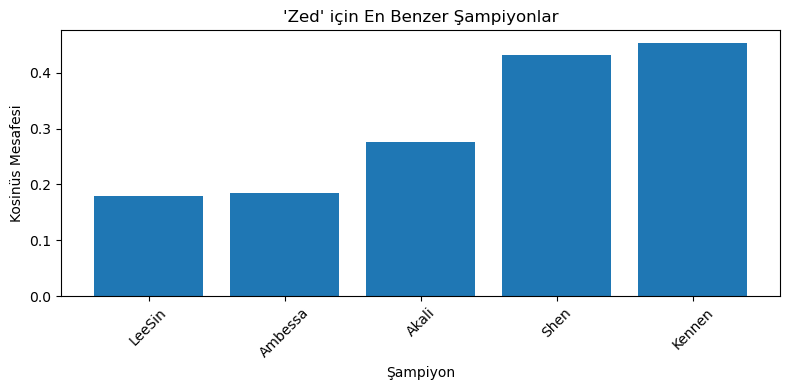

In [79]:
plot_similar_championsss('Zed', df, scaled_features, knn)